<a target="_blank" href="https://colab.research.google.com/github/jmanuelc87/nmp-autoavanza/blob/main/notebooks/image_analysis_01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Image Analysis I

Perform image analysis using some digital image processing techniques

In [19]:
import os
import cv2
import glob
import math
import fitz

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

In [20]:
images_pdfs = glob.glob('./data/bronze/credenciales/anverso/*.pdf')

In [21]:
mat = fitz.Matrix(3, 3)

for pdf_path in images_pdfs:
    doc = fitz.open(pdf_path)
    for page in doc:
        pix = page.get_pixmap(matrix=mat)
        name = os.path.basename(pdf_path).replace('.pdf', '')
        pix.save(f'./data/bronze/images/anverso/{name}.png')

In [22]:
images_paths = glob.glob('./data/bronze/images/anverso/*.png')

In [23]:
images_np = []

for image_path in images_paths:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    images_np.append(image)

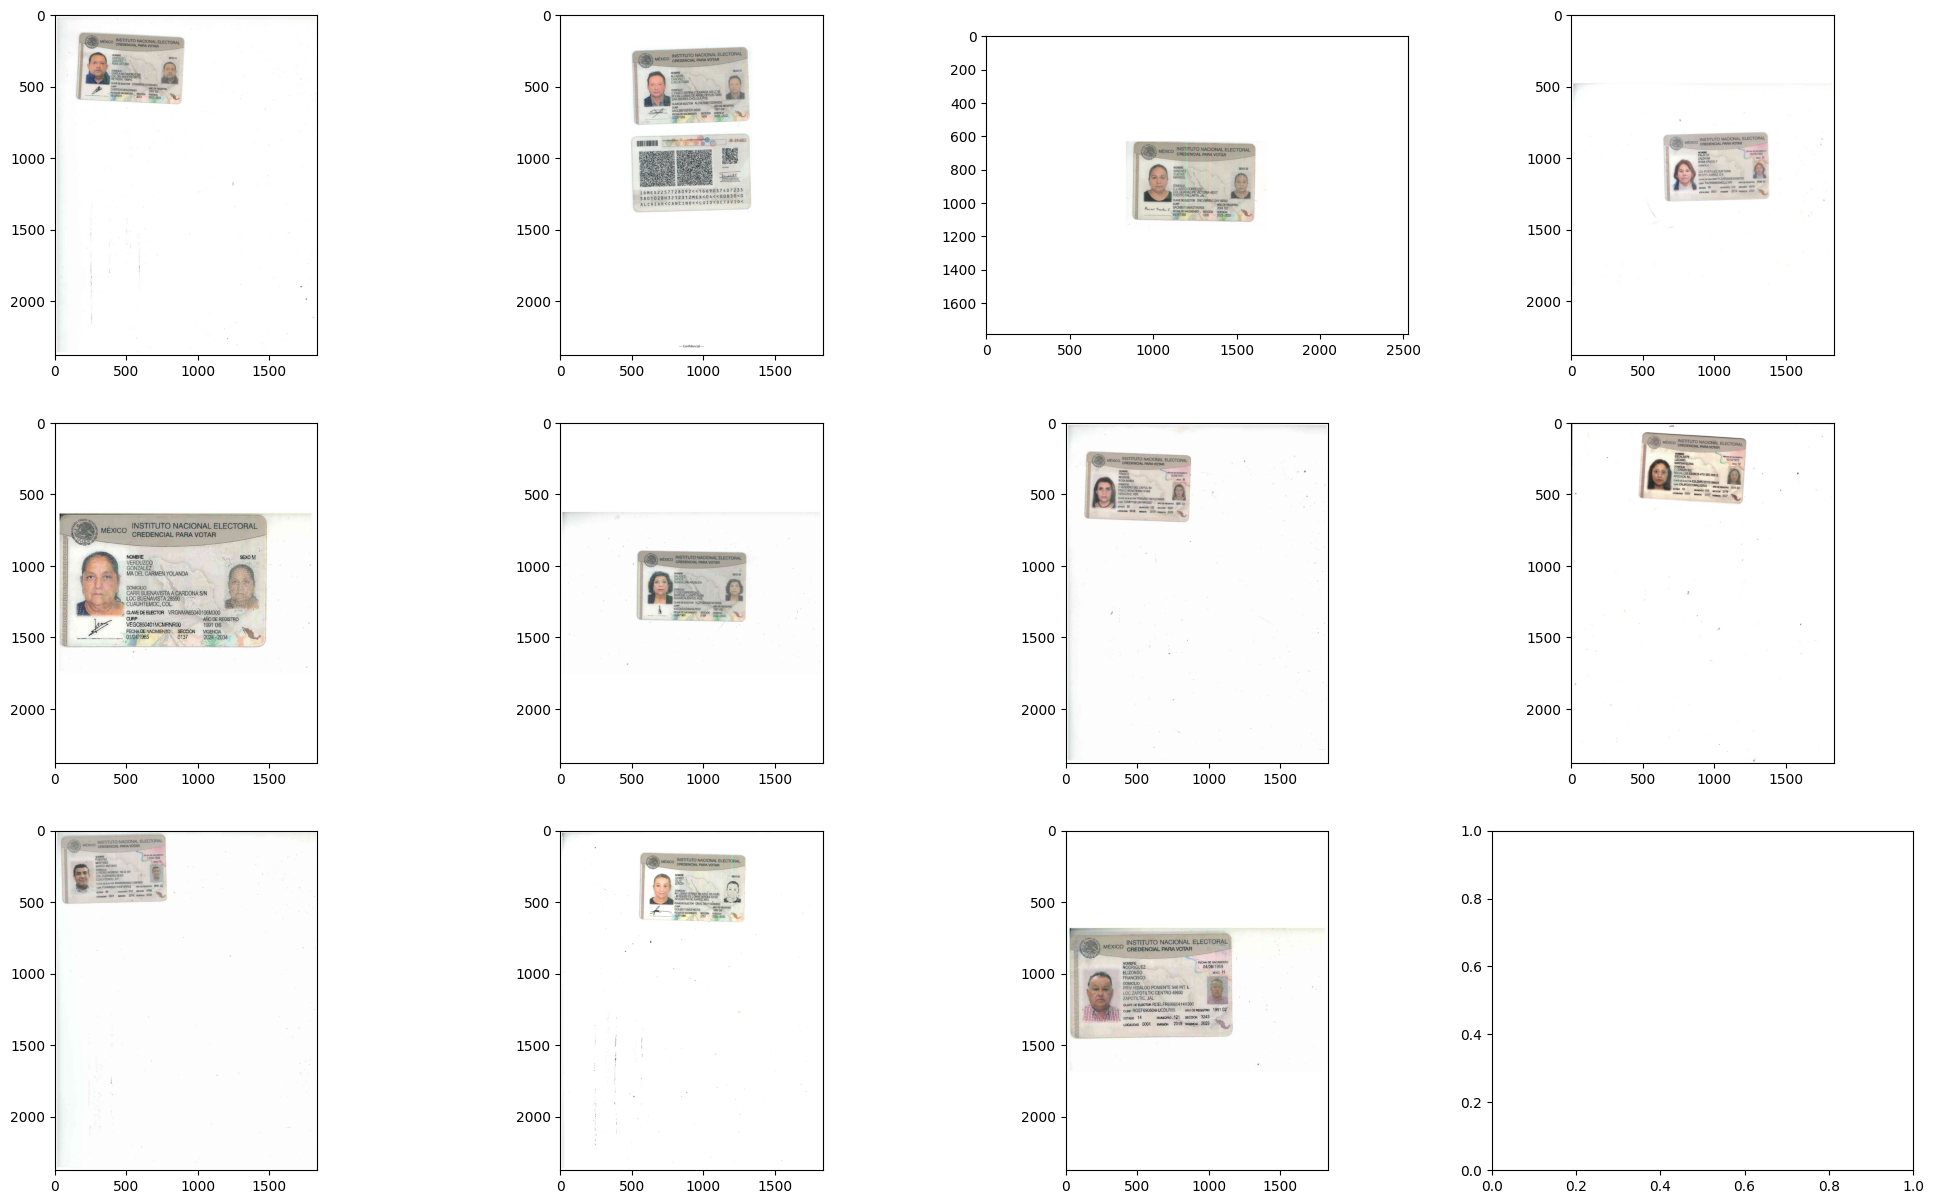

In [24]:
x = math.ceil(math.sqrt(len(images_np)))

fig, axs = plt.subplots(x-1,x, figsize=(25,15))
axs = axs.flatten()
for i, image in enumerate(images_np):
    axs[i].imshow(image)

## Extract Bounding Box

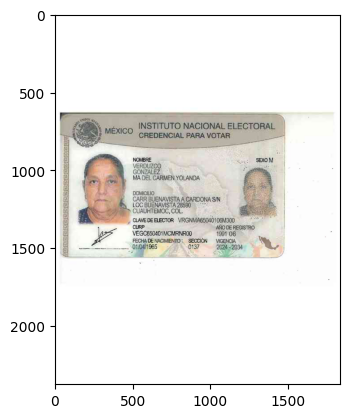

In [25]:
image = images_np[4].copy()

plt.imshow(image, cmap='gray')

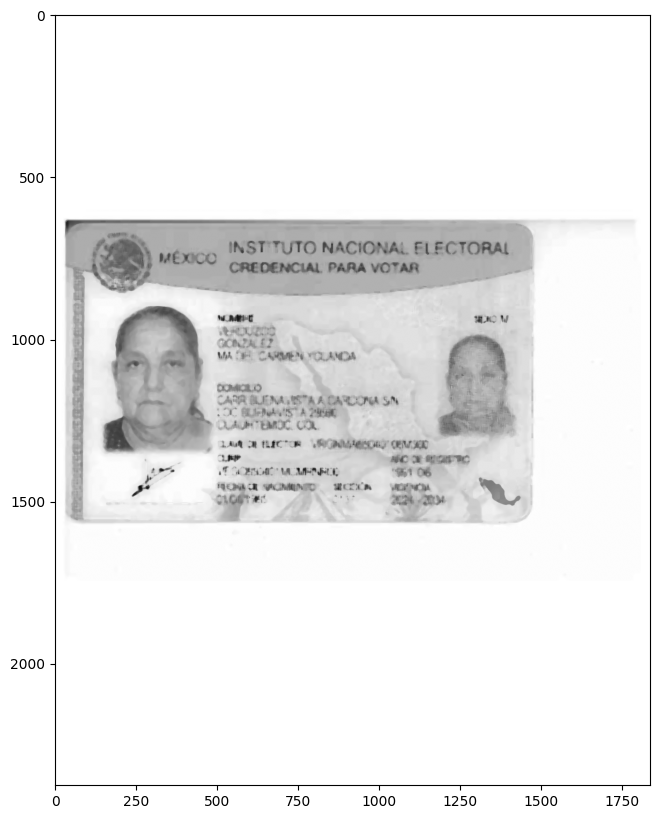

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blured = cv2.medianBlur(gray, ksize=11)

plt.figure(figsize=(10,10))
plt.imshow(blured, cmap='gray')

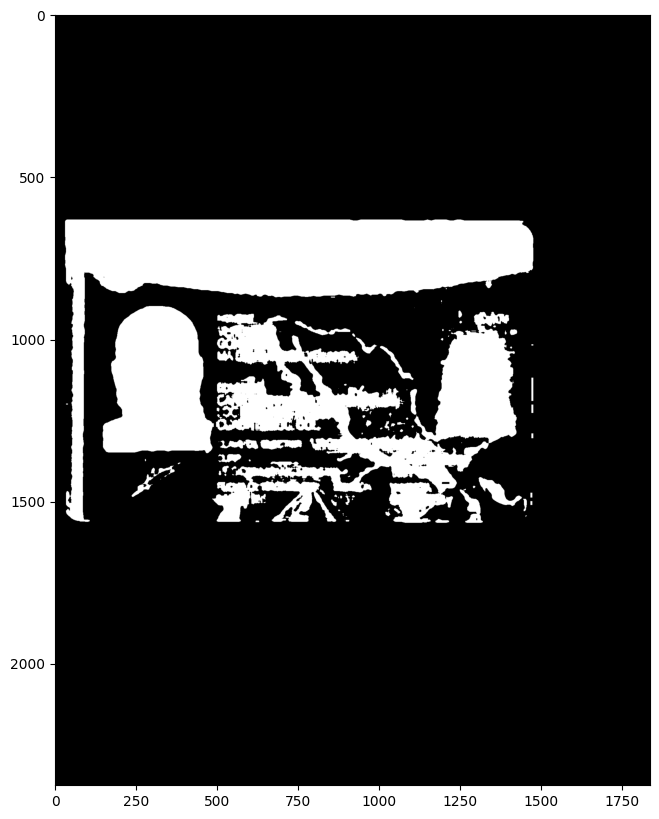

In [27]:
_, thresh = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')

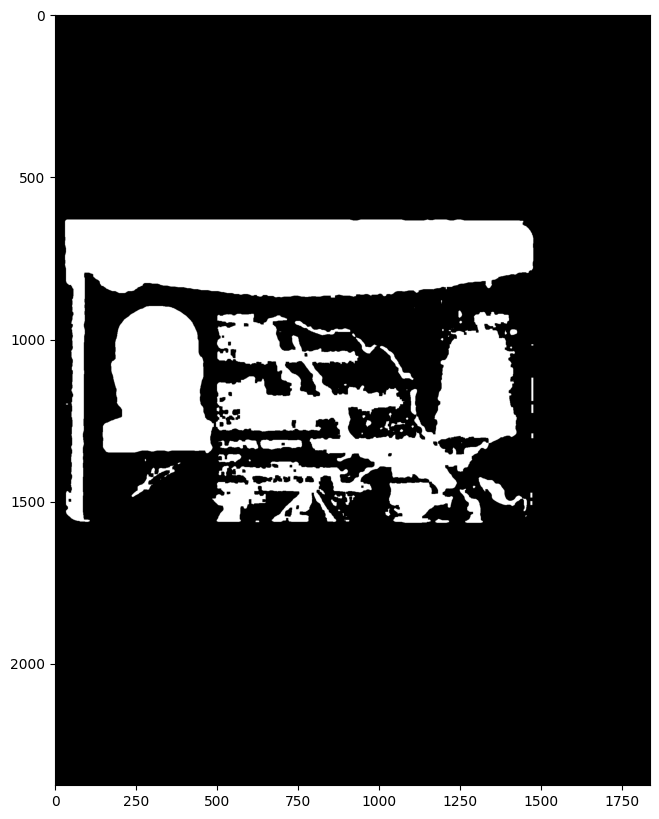

In [28]:
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel)


plt.figure(figsize=(10,10))
plt.imshow(close, cmap='gray')

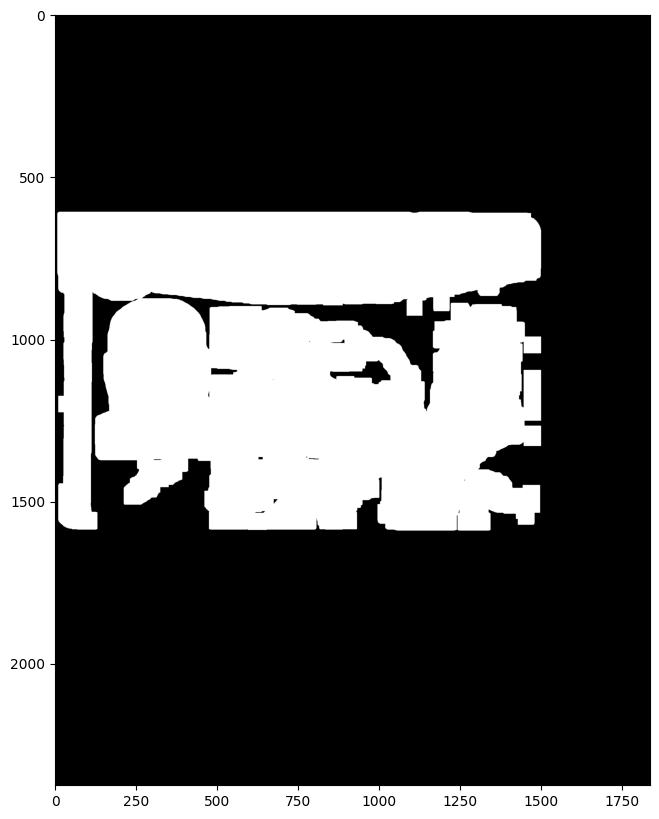

In [29]:
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
dilate = cv2.dilate(close, dilate_kernel, iterations=8)

plt.figure(figsize=(10,10))
plt.imshow(dilate, cmap='gray')

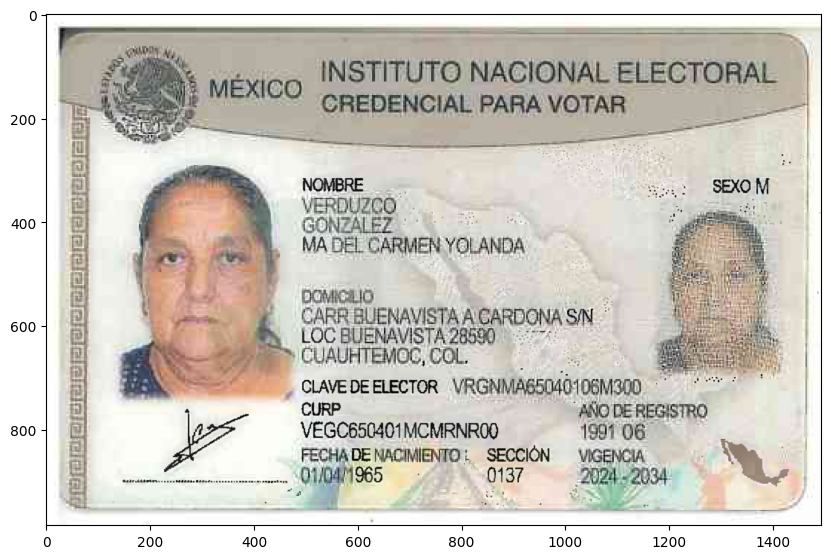

In [30]:
image_contours = image.copy()

contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

largest_area = -1
largest_contour_idx = -1
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > largest_area:
        largest_area = area
        largest_contour_idx = i

rect = cv2.boundingRect(contours[largest_contour_idx])

# cv2.rectangle(image_contours, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0,255,0), 3)

plt.figure(figsize=(10,10))
plt.imshow(image_contours[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]])

## Apply the method for all the images

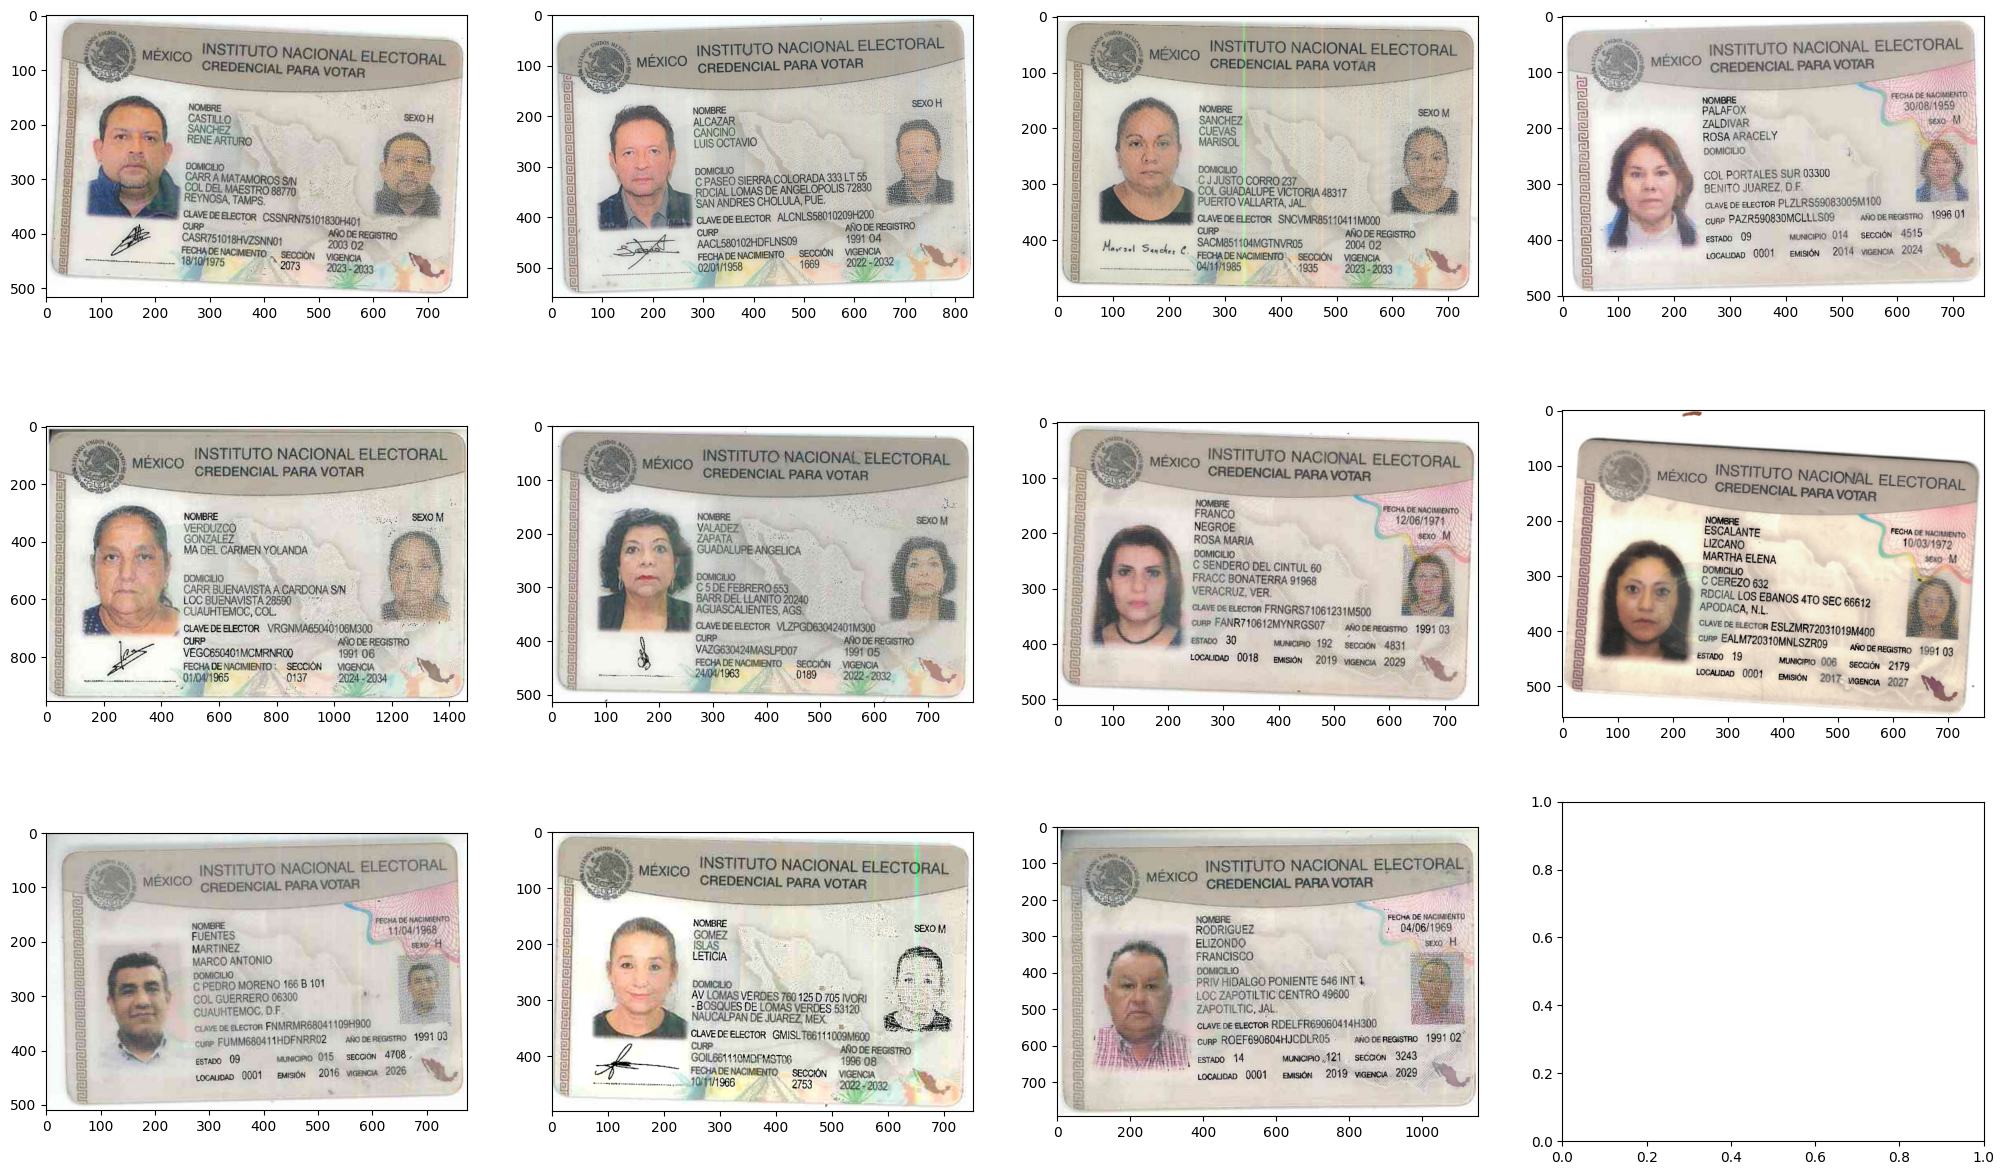

In [31]:
x = math.ceil(math.sqrt(len(images_np)))

cropped_images = []

fig, axs = plt.subplots(x-1,x, figsize=(25,15))
axs = axs.flatten()
for i, image in enumerate(images_np):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blured = cv2.medianBlur(gray, ksize=11)
    _, thresh = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)

    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    dilate = cv2.dilate(close, dilate_kernel, iterations=8)

    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    largest_area = -1
    largest_contour_idx = -1
    for k, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area > largest_area:
            largest_area = area
            largest_contour_idx = k

    rect = cv2.boundingRect(contours[largest_contour_idx])

    cropped = image[rect[1]+15:rect[1]+rect[3]-15, rect[0]+15:rect[0]+rect[2]-15].copy()
    cropped_images.append(cropped)
    
    axs[i].imshow(cropped)

In [42]:
for i, image in enumerate(cropped_images):
    h,w,c = image.shape
    sized = Image.fromarray(image)
    sized = ImageOps.contain(sized, (1024, 1024))
    print(sized.size)
    sized.save(f"./data/bronze/resized/anverso/{i}.png", "PNG")

(1024, 685)
(1024, 686)
(1024, 679)
(1024, 680)
(1024, 668)
(1024, 670)
(1024, 688)
(1024, 746)
(1024, 674)
(1024, 679)
(1024, 703)
